In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import math 
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv("xtrain.csv")
target = pd.read_csv("ytrain.csv")
test = pd.read_csv("xtest.csv")

In [3]:
train.head()

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,-42.822536,NaN,12.0,NaN,1.0,2.0,24.0,-45.025510,NaN,1.0,...,17.871210,4.0,15.0,21.863365,-13.349394,-2.215086,-5.137377,20.904186,53.939262,-17.328346
1,-13.478816,13.0,12.0,75.132502,0.0,2.0,24.0,-49.213545,7.0,0.0,...,21.511019,2.0,13.0,-2.880103,21.739125,5.464161,-30.347612,23.304507,47.746225,-47.305489
2,51.702721,13.0,12.0,63.459270,0.0,3.0,24.0,-58.777043,8.0,0.0,...,NaN,3.0,16.0,21.851623,NaN,7.471764,-12.348314,34.406243,34.479515,-33.326172
3,NaN,12.0,13.0,-15.492561,1.0,1.0,23.0,0.624258,9.0,0.0,...,16.964848,2.0,15.0,-25.128119,-26.858262,54.203501,10.341217,29.080753,40.235855,-35.835956
4,7.633273,NaN,13.0,59.862681,0.0,3.0,NaN,-61.395319,NaN,0.0,...,8.467076,4.0,14.0,30.610006,-15.663721,38.323843,-65.561821,33.965883,50.245794,-44.018245


In [4]:
train.describe()

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
count,820529.000000,808921.000000,831550.000000,828051.000000,819375.000000,796632.000000,791582.000000,796405.000000,840044.000000,794046.000000,...,803958.000000,836761.000000,798606.000000,843544.000000,814017.000000,812818.000000,800856.000000,812926.000000,835366.000000,786115.000000
mean,11.012513,12.329729,11.344055,25.406132,0.313465,2.180648,23.222268,-46.304667,7.901558,0.269151,...,20.596154,2.982181,14.680950,24.042950,-19.295371,16.461962,-25.783931,26.158484,38.320750,-37.013222
std,99.986889,0.796650,1.662548,20.636810,0.536960,0.771303,0.867651,19.875120,1.286734,0.443519,...,6.409154,1.097207,2.301128,29.146244,47.647342,45.131263,23.565330,8.508795,5.995944,15.246010
min,-480.088690,7.000000,3.000000,-72.310070,0.000000,0.000000,17.000000,-138.181159,1.000000,0.000000,...,-11.358178,0.000000,4.000000,-115.421307,-246.217734,-197.419313,-136.146509,-14.899675,9.648201,-112.352665
25%,-56.357813,12.000000,10.000000,11.492726,0.000000,2.000000,23.000000,-59.736287,7.000000,0.000000,...,16.278806,2.000000,13.000000,4.395491,-51.462848,-13.974363,-41.718505,20.427519,34.264541,-47.312376
50%,11.029669,13.000000,11.000000,25.421574,0.000000,2.000000,23.000000,-46.305721,8.000000,0.000000,...,20.605346,3.000000,15.000000,24.050412,-19.318562,16.460499,-25.779677,26.149082,38.316862,-36.990170
75%,78.379658,13.000000,13.000000,39.346755,1.000000,3.000000,24.000000,-32.910540,9.000000,1.000000,...,24.915043,4.000000,16.000000,43.716637,12.907192,46.941529,-9.868830,31.893980,42.376050,-26.696559
max,545.896248,13.000000,15.000000,128.900592,4.000000,3.000000,24.000000,55.334255,10.000000,1.000000,...,51.729840,5.000000,23.000000,164.653264,209.925962,226.741140,81.935811,73.609990,69.557056,41.368872


In [5]:
target.head()

,x
0,1
1,0
2,0
3,1
4,0


In [6]:
for column in train:
    print column, ": ", len(train[column].unique())   

1 :  820530
2 :  8
3 :  14
4 :  828052
5 :  6
6 :  5
7 :  9
8 :  796406
9 :  11
10 :  3
11 :  792090
12 :  822005
13 :  801825
14 :  822892
15 :  14
16 :  822113
17 :  15
18 :  14
19 :  857587
20 :  829600
21 :  20
22 :  14
23 :  5
24 :  17
25 :  809401
26 :  19
27 :  23
28 :  812096
29 :  14
30 :  7
31 :  7
32 :  11
33 :  815736
34 :  815944
35 :  800967
36 :  15
37 :  831797
38 :  816784
39 :  812254
40 :  786254
41 :  832849
42 :  844695
43 :  820060
44 :  5
45 :  10
46 :  820502
47 :  3
48 :  15
49 :  803959
50 :  7
51 :  21
52 :  843545
53 :  814018
54 :  812819
55 :  800857
56 :  812927
57 :  835366
58 :  786116


In [3]:
cat_features = []
real_features = []

for column in train:
    if len(train[column].unique()) > 21:
        real_features.append(column)
    else:
        cat_features.append(column)
    

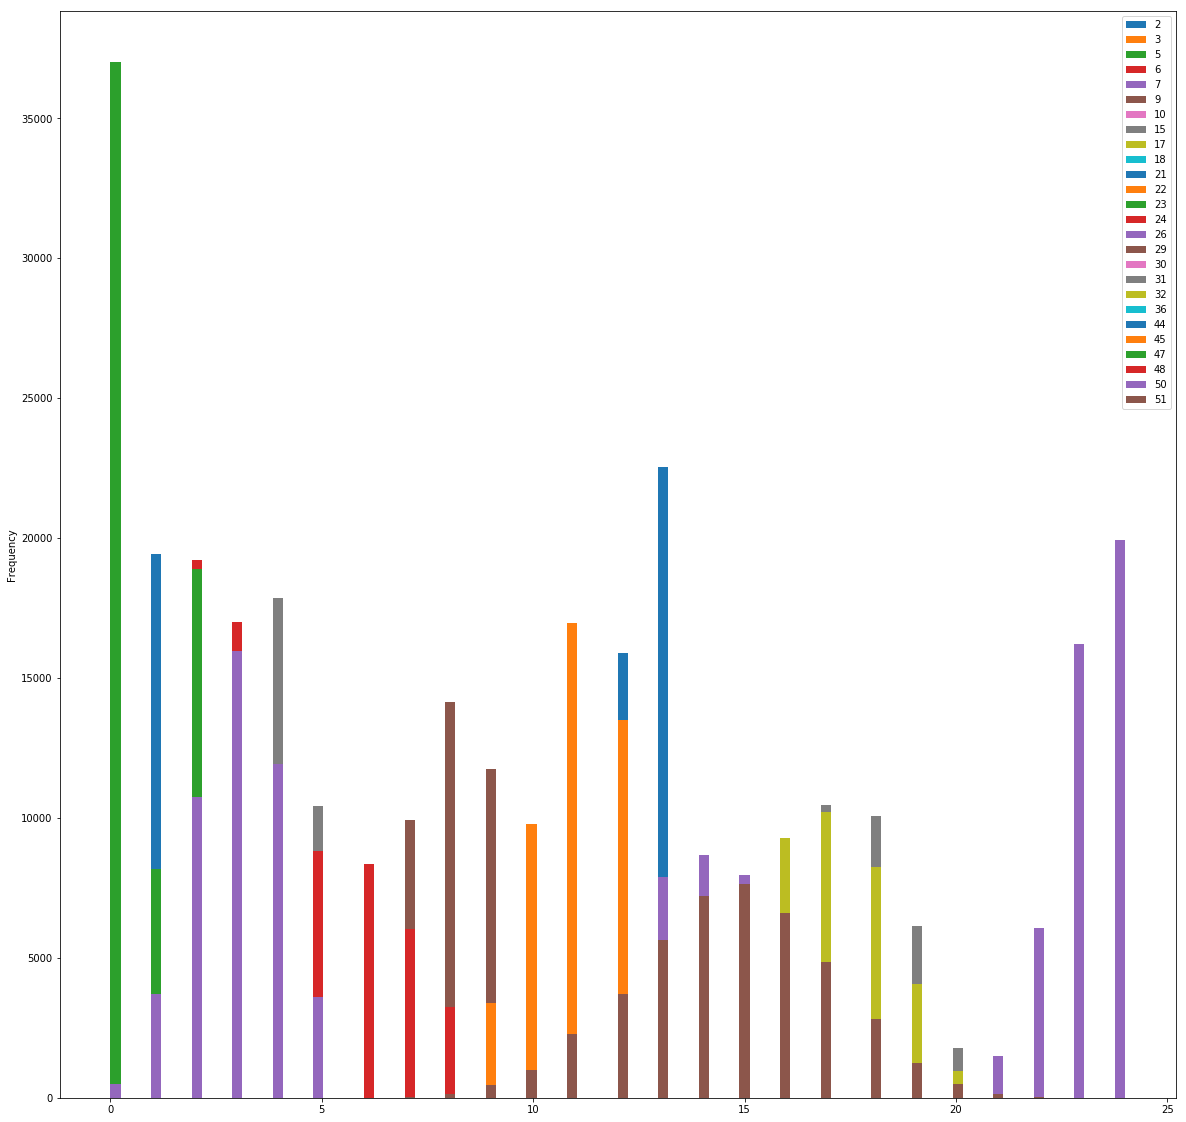

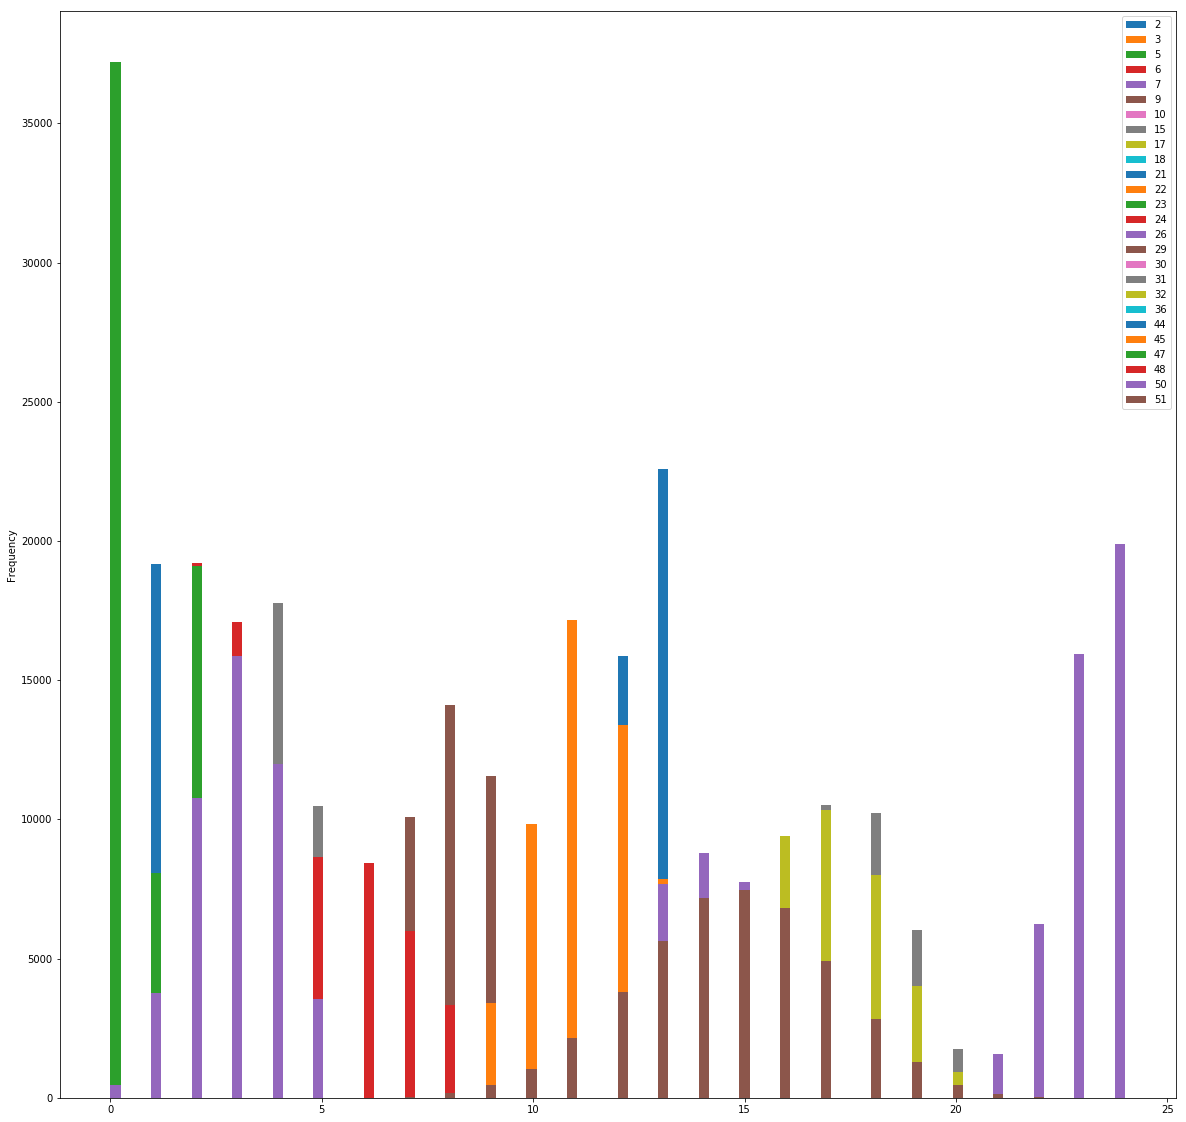

In [8]:
# построим гистограммы для первых 50к значений для категориальных признаков
train[cat_features].head(50000).plot.hist(bins = 100, figsize=(20, 20))
test[cat_features].head(50000).plot.hist(bins = 100, figsize=(20, 20))

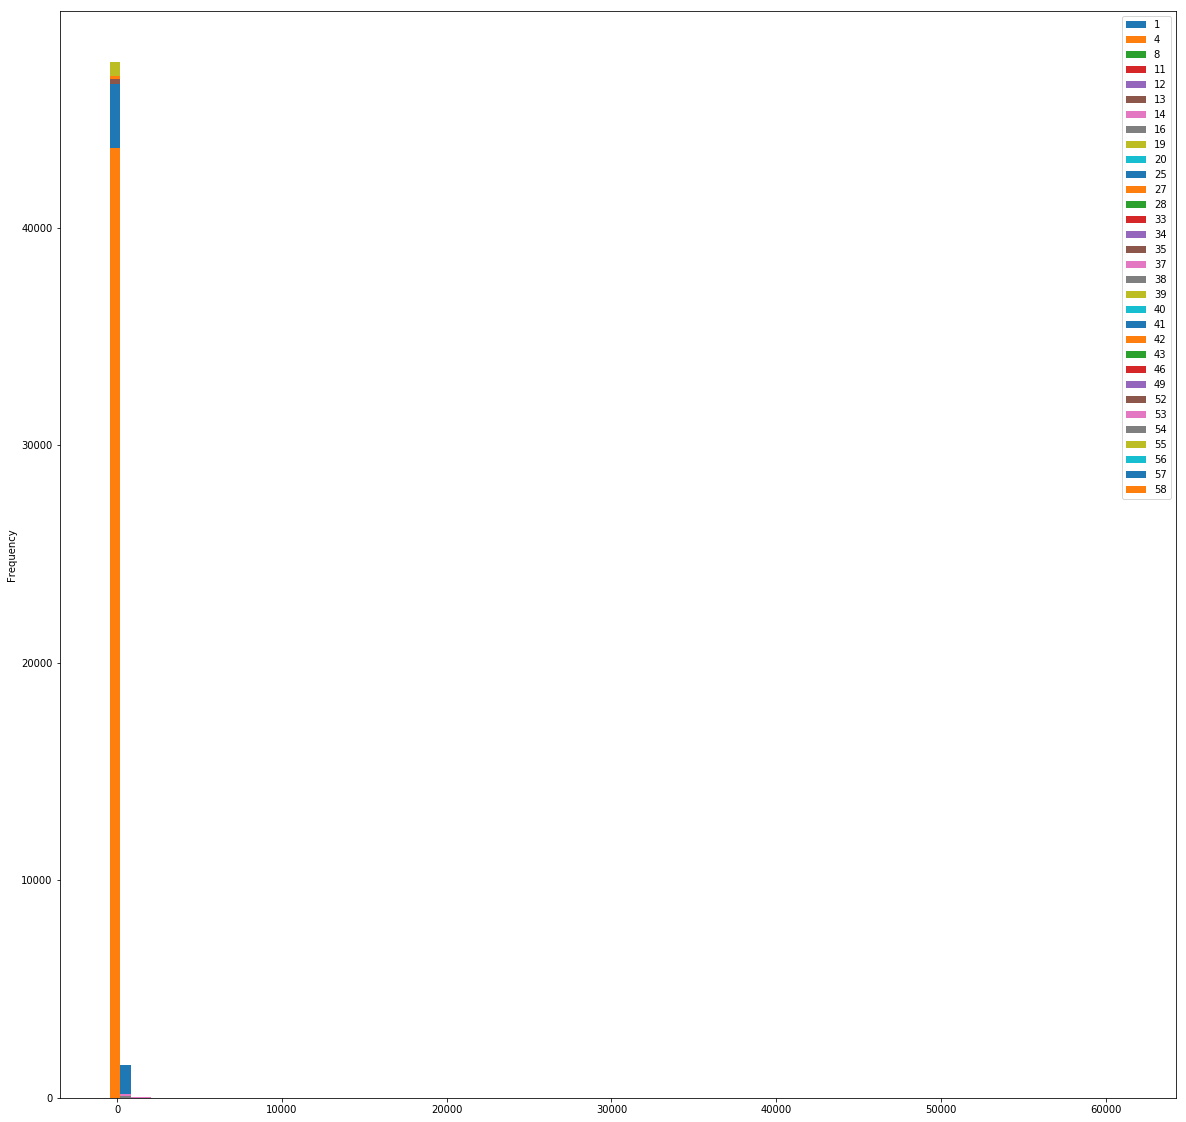

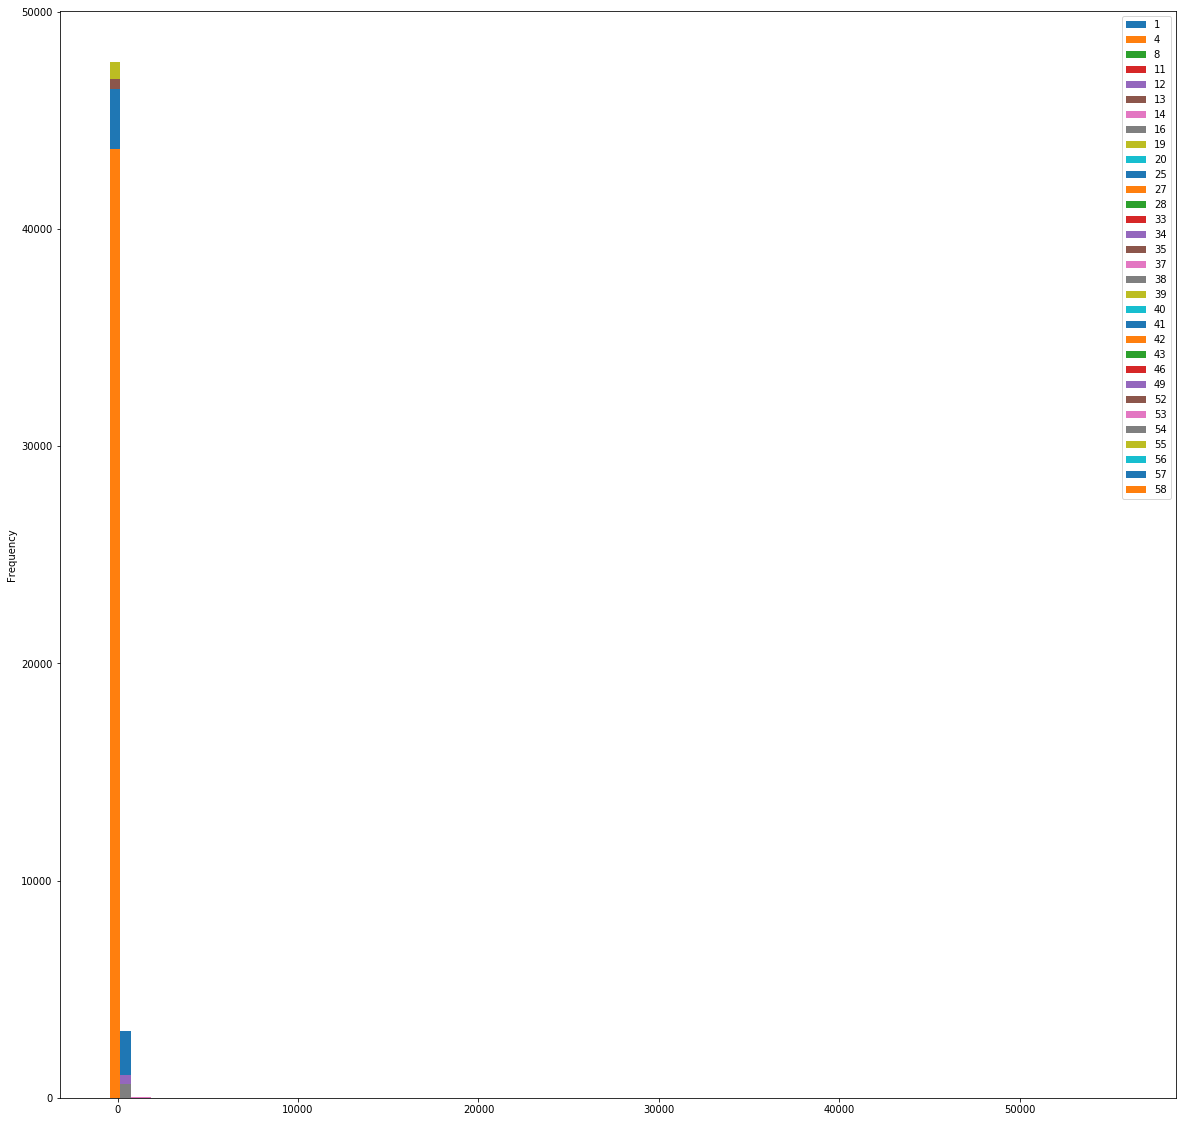

In [9]:
# построим гистограммы для первых 50к значений для остальных признаков
train[real_features].head(50000).plot.hist(bins = 100, figsize=(20, 20))
test[real_features].head(50000).plot.hist(bins = 100, figsize=(20, 20))

#гистограммы для теста и обучающей выборки совпадают

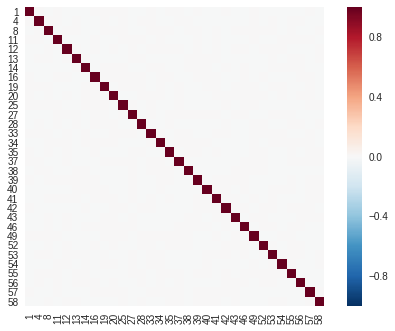

In [17]:
import seaborn
seaborn.heatmap(train[real_features].corr(), square=True)
#числовые признаки не коррелируеют между собой

In [11]:
# в данных есть nan values в каждом столбце
train.isnull().sum()

1      79471
2      91079
3      68450
4      71949
5      80625
6     103368
7     108418
8     103595
9      59956
10    105954
11    107911
12     77918
13     98176
14     77109
15    114703
16     77888
17     95691
18     92278
19     42414
20     70401
21     96029
22     86128
23    131388
24     76619
25     90600
26     76446
27    107409
28     87905
29    113008
30     78357
31     72053
32     79065
33     84265
34     84057
35     99034
36     84897
37     68204
38     83217
39     87747
40    113747
41     67152
42     55306
43     79941
44    105538
45     93753
46     79499
47     86376
48     92006
49     96042
50     63239
51    101394
52     56456
53     85983
54     87182
55     99144
56     87074
57     64634
58    113885
dtype: int64

In [5]:
#для категориальных признаков, nan значения заменим -1
#Для действительных признаков - заменим средним значнием
train[cat_features] = train[cat_features].fillna(-1)
  

In [6]:
for column in train[real_features]:
    mean_val = train[column].mean()
    train[column] = train[column].fillna(mean_val)

In [7]:
target.mean() #класса 0 больше чем 1

x    0.306733
dtype: float64

In [ ]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split

X_fit, X_eval, y_fit, y_eval= train_test_split(
    train, target, test_size=0.20, random_state=1
)

clf = xgb.XGBClassifier(missing=np.nan, max_depth=3, 
                        n_estimators=550, learning_rate=0.05, gamma =0.3, min_child_weight = 3,
                        subsample=0.9, colsample_bytree=0.8, seed=2000,objective= 'binary:logistic')

clf.fit(X_fit, y_fit, early_stopping_rounds=40,  eval_metric="auc", eval_set=[(X_eval, y_eval)])


In [23]:
auc_train = roc_auc_score(y_fit.x, clf.predict(X_fit))
auc_val = roc_auc_score(y_eval.x, clf.predict(X_eval))

print 'auc_train: ', auc_train
print 'auc_val: ', auc_val

#имеет место быть переобучение

auc_train:  0.553770758732
auc_val:  0.552502316614


In [40]:
eps = 1e-5
dropped_columns = set()
C = train.columns
#Определим константные признаки
for c in C:
    if train[c].var() < eps:
        print '.. %-30s: too low variance ... column ignored'%(c)
        dropped_columns.add(c)
#таких не обнаружено

In [41]:
for i, c1 in enumerate(C):
    f1 = train[c1].values
    for j, c2 in enumerate(C[i+1:]):
        f2 = train[c2].values
        if np.all(f1 == f2):
            dropped_columns.add(c2)
            print c2
# одинаковых полей также нет

Feature ranking:
1. feature 11 (0.018281)
2. feature 33 (0.018268)
3. feature 13 (0.018228)
4. feature 40 (0.018156)
5. feature 10 (0.018108)
6. feature 52 (0.018095)
7. feature 45 (0.018085)
8. feature 41 (0.018078)
9. feature 19 (0.018045)
10. feature 51 (0.018021)
11. feature 55 (0.018017)
12. feature 32 (0.018017)
13. feature 53 (0.018003)
14. feature 54 (0.017998)
15. feature 37 (0.017997)
16. feature 34 (0.017996)
17. feature 7 (0.017995)
18. feature 27 (0.017994)
19. feature 42 (0.017992)
20. feature 18 (0.017987)
21. feature 56 (0.017968)
22. feature 38 (0.017966)
23. feature 57 (0.017961)
24. feature 3 (0.017956)
25. feature 48 (0.017951)
26. feature 24 (0.017942)
27. feature 15 (0.017901)
28. feature 0 (0.017894)
29. feature 12 (0.017852)
30. feature 39 (0.017843)
31. feature 26 (0.017689)
32. feature 21 (0.017592)
33. feature 20 (0.017566)
34. feature 35 (0.017560)
35. feature 23 (0.017536)
36. feature 28 (0.017486)
37. feature 47 (0.017442)
38. feature 31 (0.017387)
39. fea

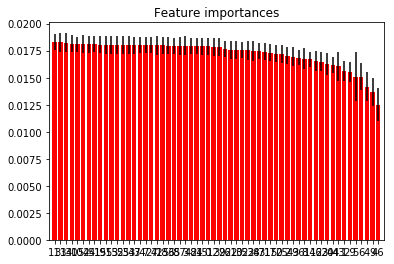

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
forest = ExtraTreesClassifier(n_estimators=150,
                              random_state=0)

forest.fit(train.head(100000), target.head(100000).x)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Попробуем посмотреть  какие признаки значимы с помощью деревьев
print("Feature ranking:")

for f in range(train.head(100000).shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Построим графики
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.head(100000).shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train.head(100000).shape[1]), indices)
plt.xlim([-1, train.head(100000).shape[1]])
plt.show()

In [ ]:
# Явных лидеров как и аутсайдеров среди признаков не видно. Признаки анонимны, 
# еще раз обучим модель с более сложными вычислительно гиперпараметрами
from sklearn.cross_validation import train_test_split
import xgboost as xgb

X_fit, X_eval, y_fit, y_eval= train_test_split(
    train, target, test_size=0.20, random_state=1
)

clf = xgb.XGBClassifier(missing=np.nan, max_depth=3, 
                        n_estimators=1200, learning_rate=0.05, gamma =0.3, min_child_weight = 3,
                        subsample=0.9, colsample_bytree=0.8, seed=2000,objective= 'binary:logistic')

clf.fit(X_fit, y_fit, early_stopping_rounds=40,  eval_metric="auc", eval_set=[(X_eval, y_eval)])

In [13]:
# формирование результатов
test_target = clf.predict(test)
submission = pd.DataFrame(test_target)
submission.to_csv("test_target.csv", index=False)